In [111]:
from sklearn.decomposition import PCA
from glob import glob
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import warnings
from astropy.utils.exceptions import AstropyUserWarning
warnings.filterwarnings("ignore", category=AstropyUserWarning)
%matplotlib inline

In [21]:
H_dict = np.load("histogram_edges_mask.npz")

In [22]:
H_array = H_dict["H_array"]

In [23]:
xedges = H_dict["xedges"]

In [24]:
yedges = H_dict["yedges"]

In [25]:
pointings_avg = H_dict["pointings_avg"]

In [91]:
const = 100
x_min,x_max = 0,4
y_min,y_max = 10, 20

In [80]:
bin_number = int(np.sqrt(H_array.shape[1]))

In [81]:
pca = PCA(n_components=10, whiten=False)
#pca.fit(H_array)
pca.fit(np.log(H_array + const))

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)


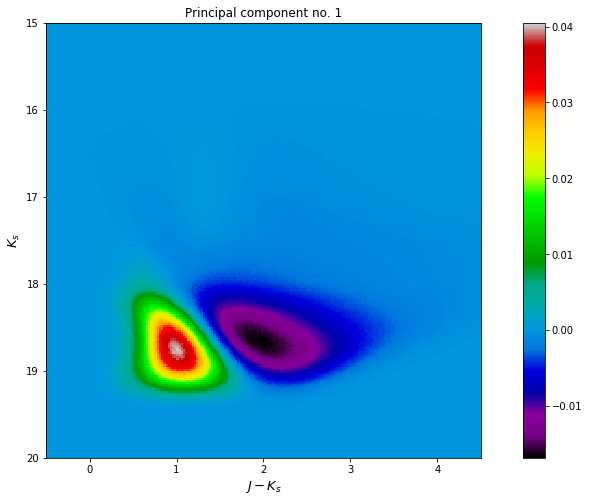

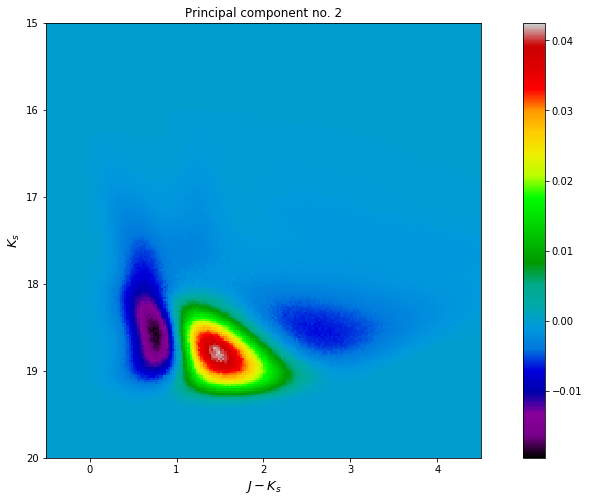

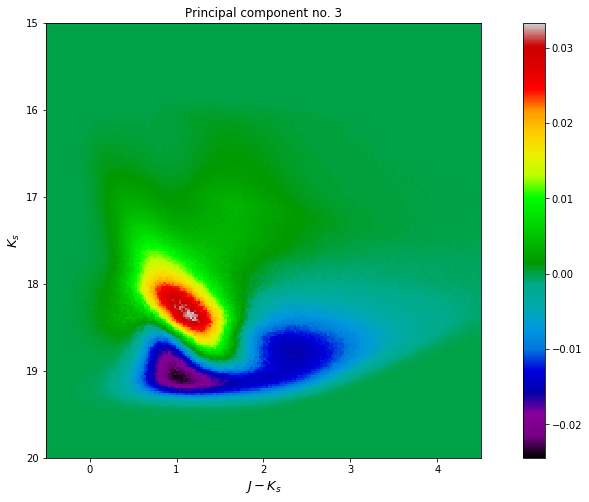

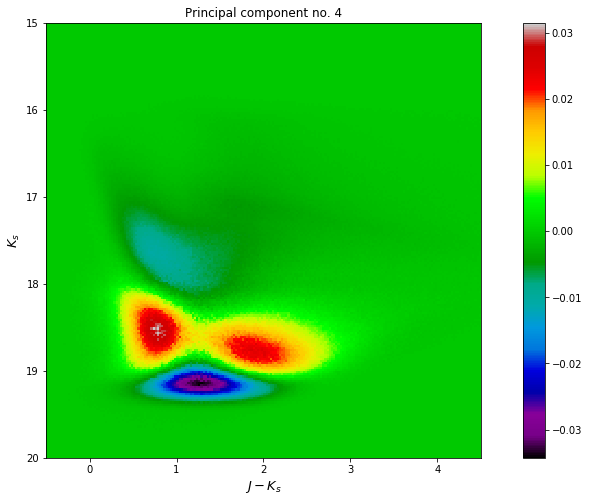

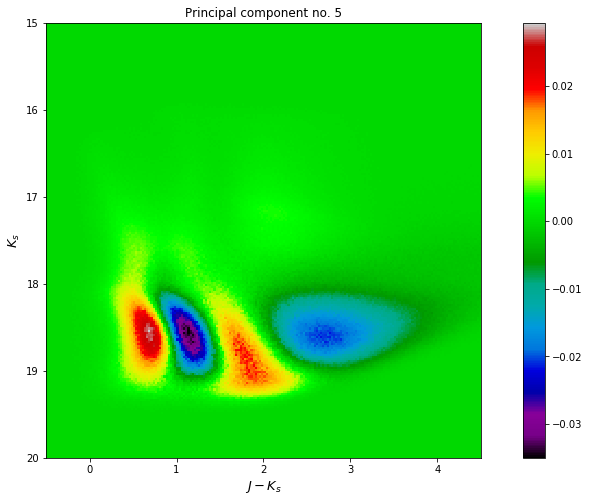

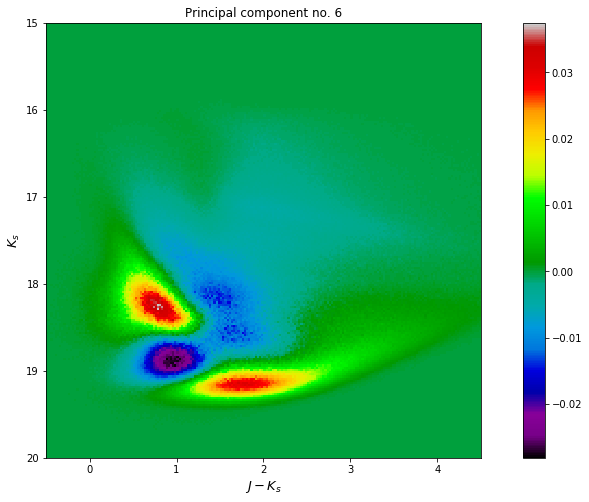

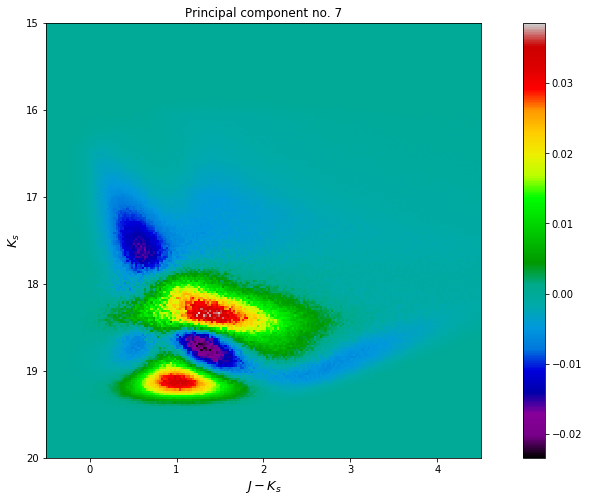

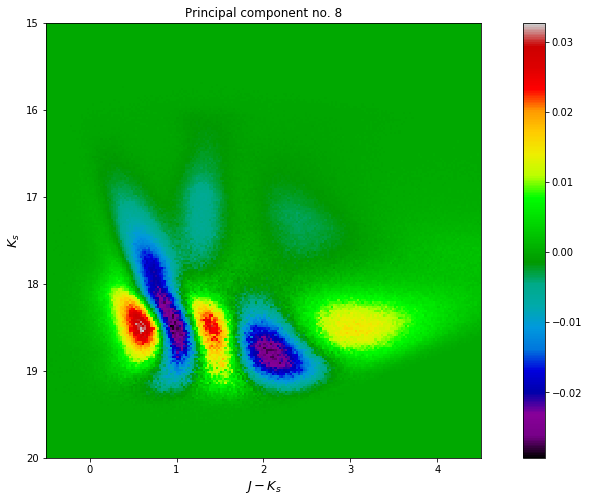

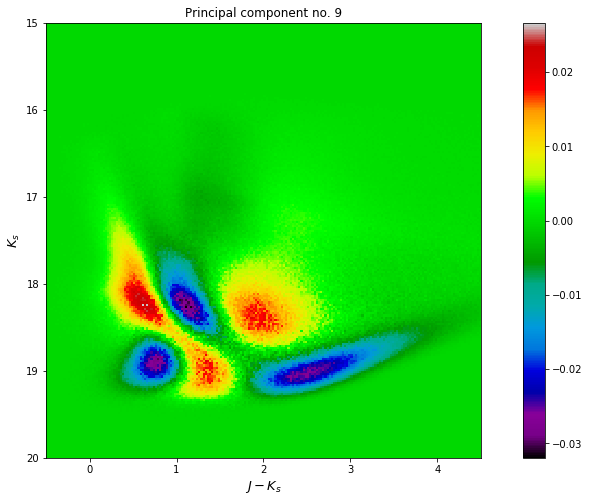

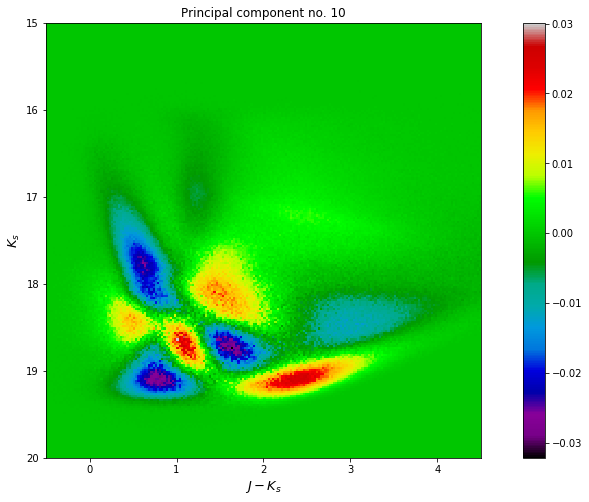

In [107]:
savename = "pc_plots_drive_%d_%d.png"
blocknumber = 10
for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    print (pc.shape)
    pc = pc.reshape((bin_number,bin_number))
    cax = ax.imshow(pc.T, cmap='nipy_spectral', interpolation='none', extent=[x_min-0.5,x_max+0.5,y_max,y_min+5])
    ax.set_title('Principal component no. %d' %(i+1) )
    cbar = fig.colorbar(cax)
    plt.xlabel("$J-K_{s}$",fontsize=13)
    plt.ylabel("$K_{s}$",fontsize=13)
    #fig.savefig(savename % (blocknumber, i))

In [83]:
H_small = pca.fit_transform(H_array)

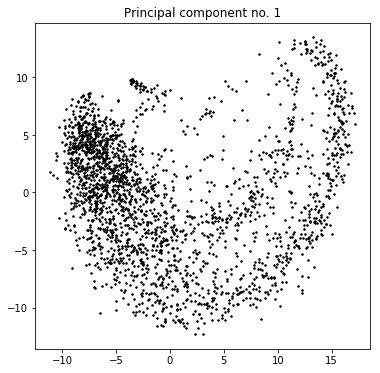

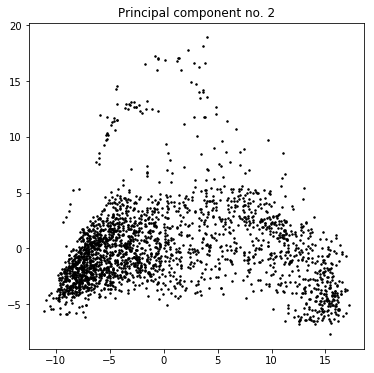

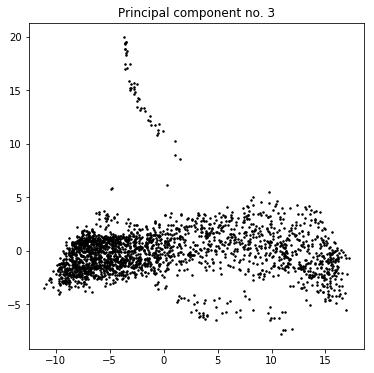

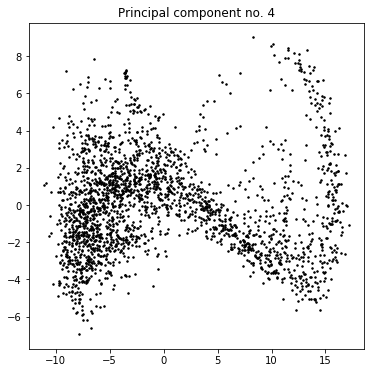

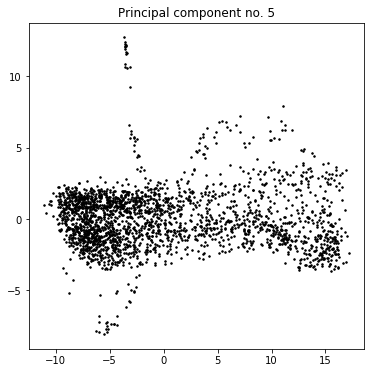

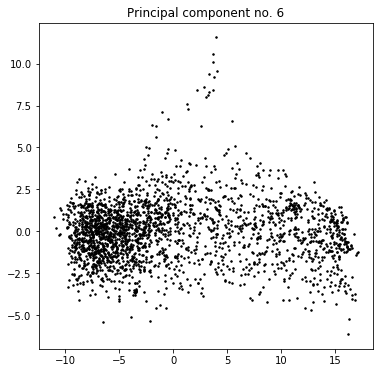

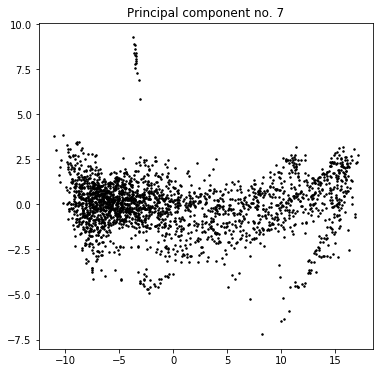

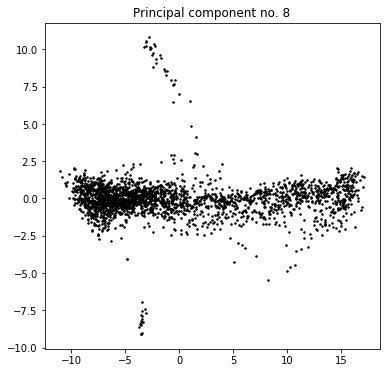

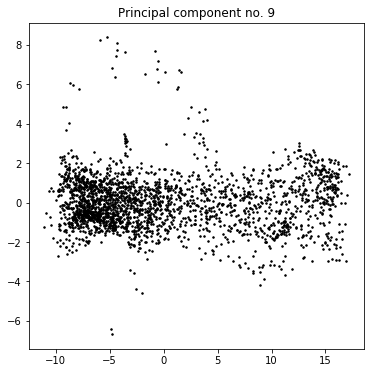

In [84]:
savename = "pc_drive_%d_%d.png"
for i in np.arange(1,10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    ax.plot(H_small[:,0], H_small[:,i], 'k.', ms=3.)
    ax.set_title('Principal component no. %d' %(i) )
    #fig.savefig(savename % (blocknumber, i+1))

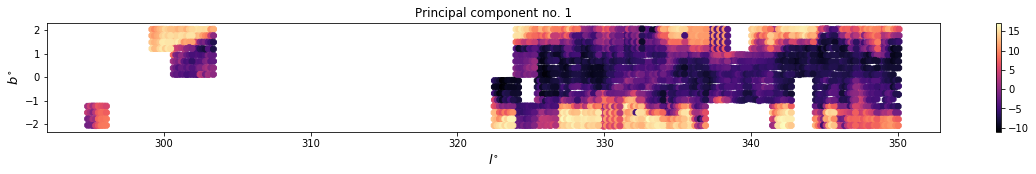

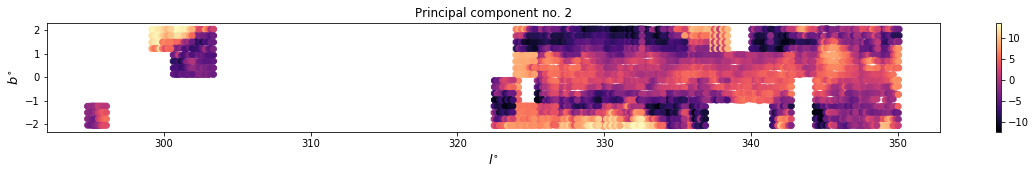

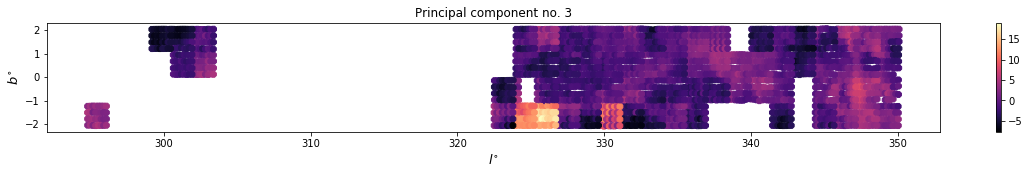

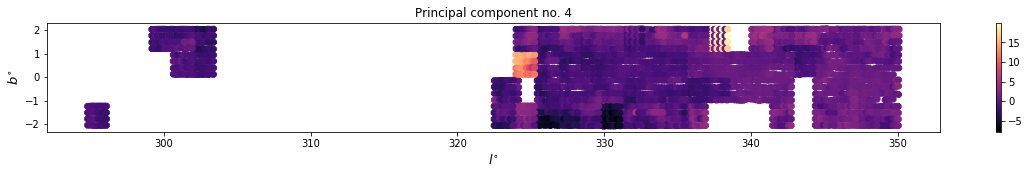

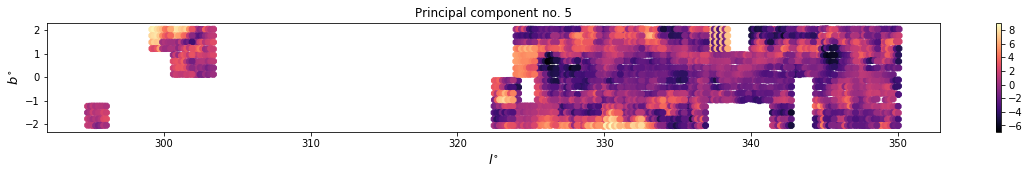

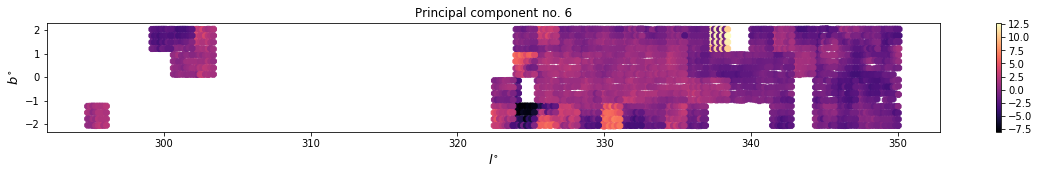

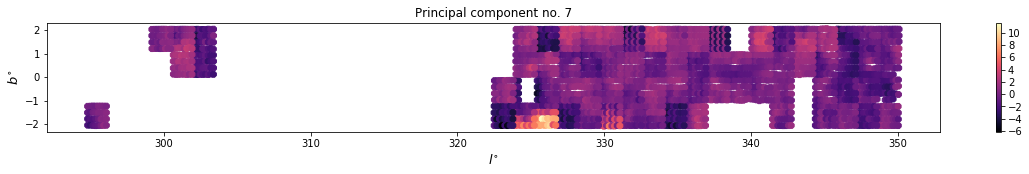

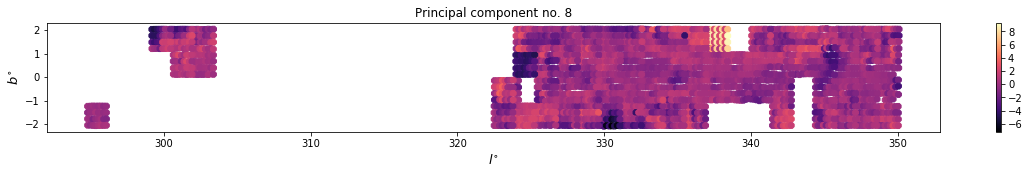

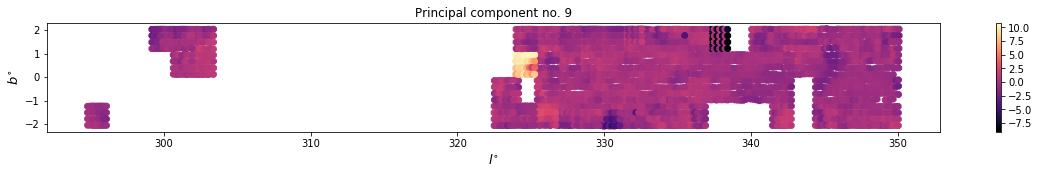

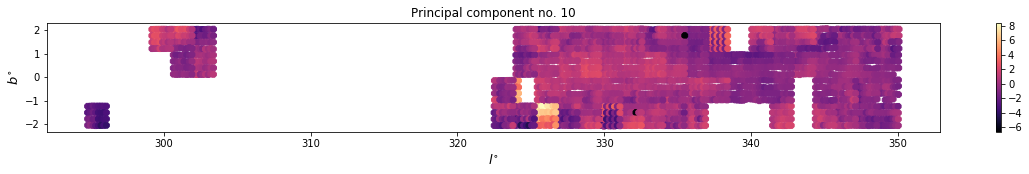

In [85]:
for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,2),facecolor='w',edgecolor='k')
    plt.scatter(pointings_avg[:,0], pointings_avg[:,1], c=H_small[:,i], cmap='magma', marker='8',s=40);
    plt.colorbar()
    ax.set_title('Principal component no. %d' %(i+1) )
    plt.xlabel("$l ^{\circ}$",fontsize=13)
    plt.ylabel("$b ^{\circ}$",fontsize=13)
    #plt.savefig("PC_galactic_l_b_%d.png" %i)

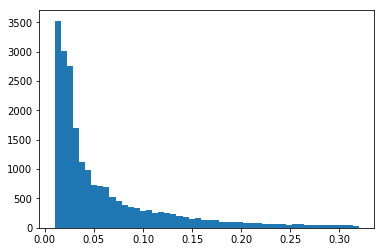

In [86]:
stddev = H_array.std(axis=0)
stddev = stddev[stddev>0.01]
xedges, yedges, patch = plt.hist(stddev, bins=50)

In [103]:
# Creating a mask using the second principal component and re-fitting
mask = (H_small[:,1] < 4.5)

#pca.fit(H_array[mask])
pca.fit(np.log(H_array[mask] + const))
H_small_mask = pca.fit_transform(H_array[mask])

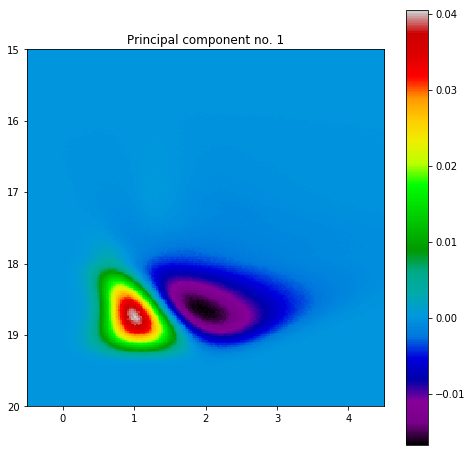

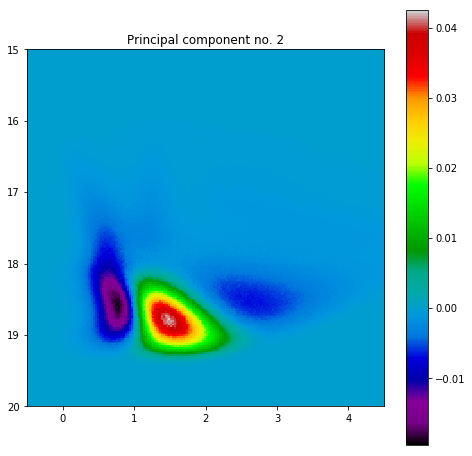

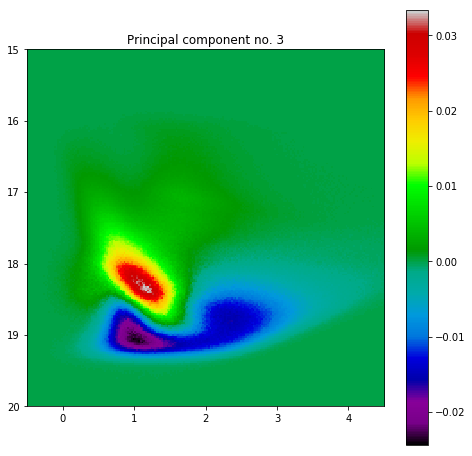

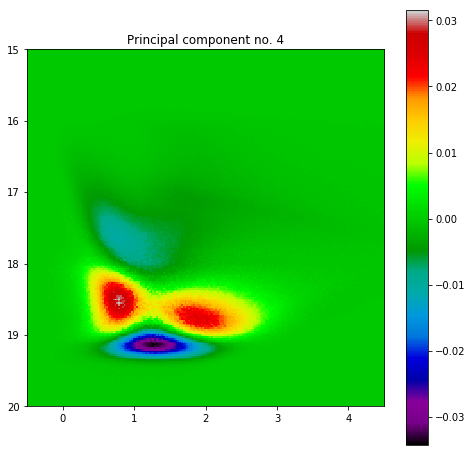

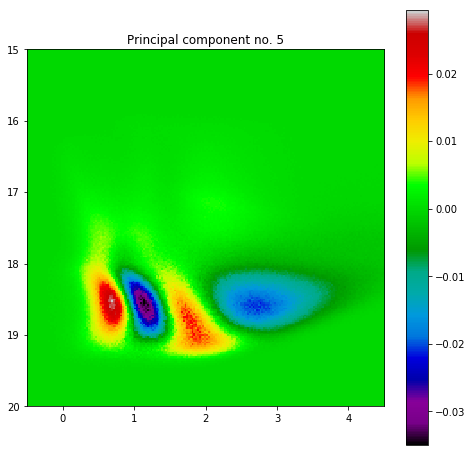

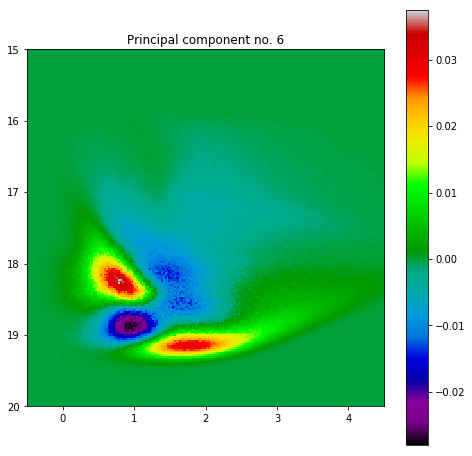

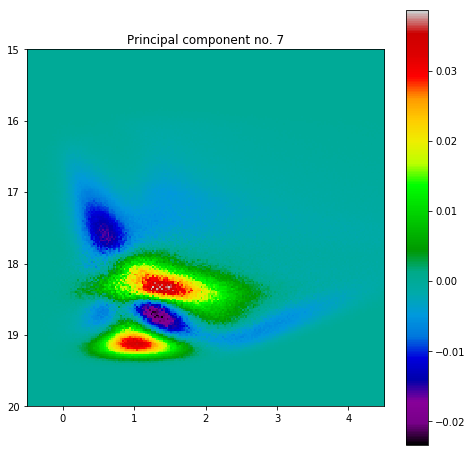

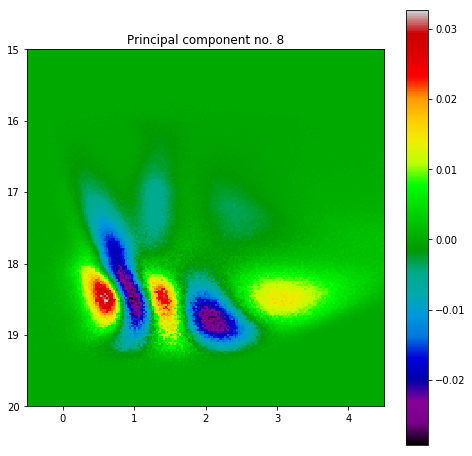

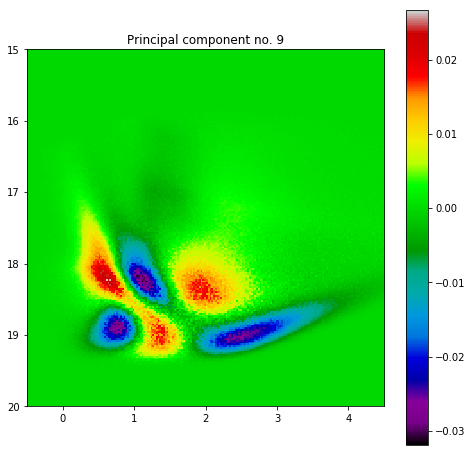

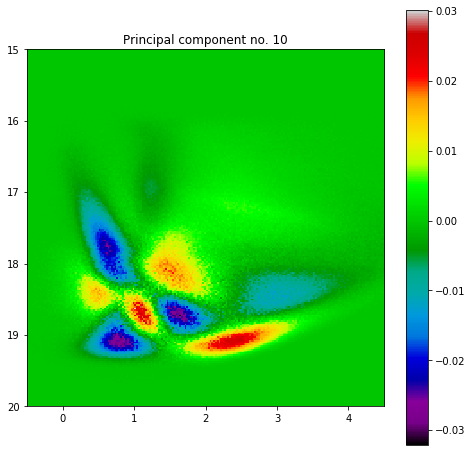

In [104]:
savename = "pc_plots_drive_%d_%d_masked.png"
blocknumber = 10
for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    cax = ax.imshow(pc.T, cmap='nipy_spectral', interpolation='none', extent=[x_min-0.5,x_max+0.5,y_max,y_min+5])
    ax.set_title('Principal component no. %d' %(i+1) )
    cbar = fig.colorbar(cax)
    #fig.savefig(savename % (blocknumber, i))

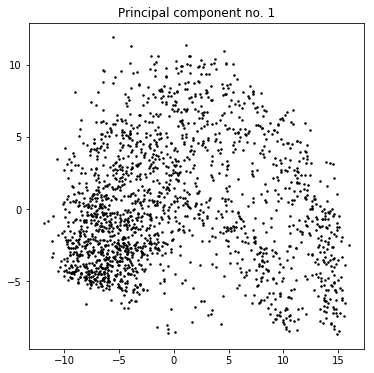

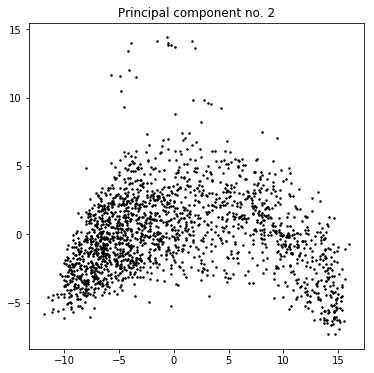

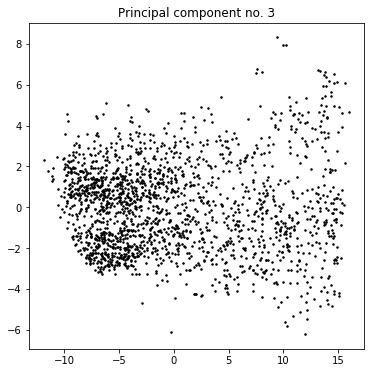

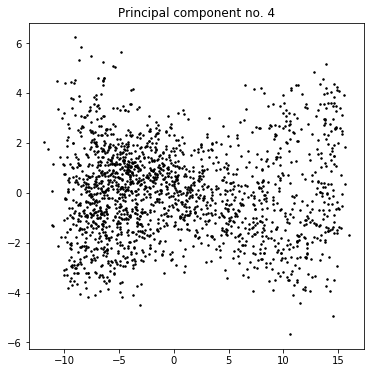

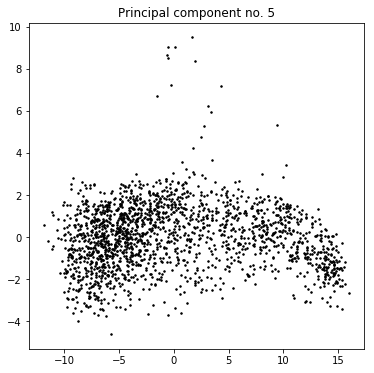

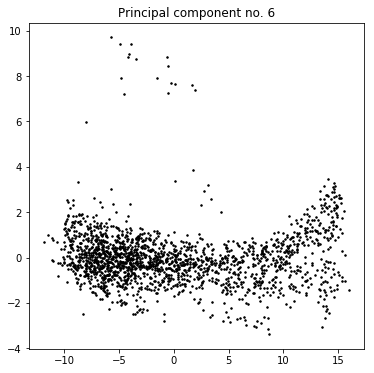

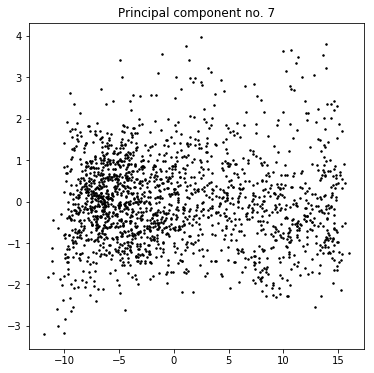

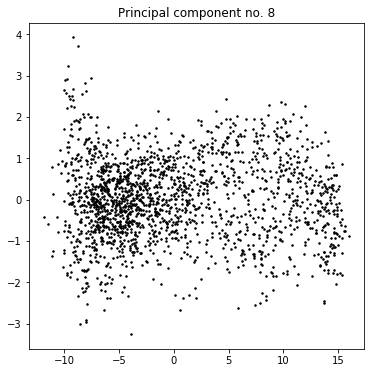

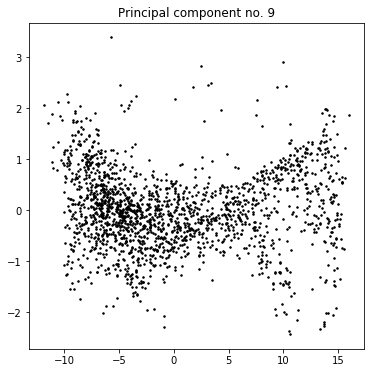

In [105]:
for i in np.arange(1,10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    ax.plot(H_small_mask[:,0], H_small_mask[:,i], 'k.', ms=3.)
    ax.set_title('Principal component no. %d' %(i) )

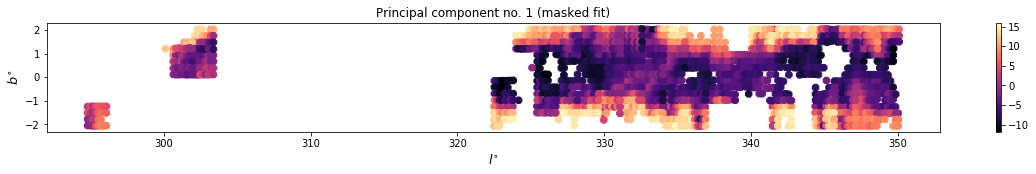

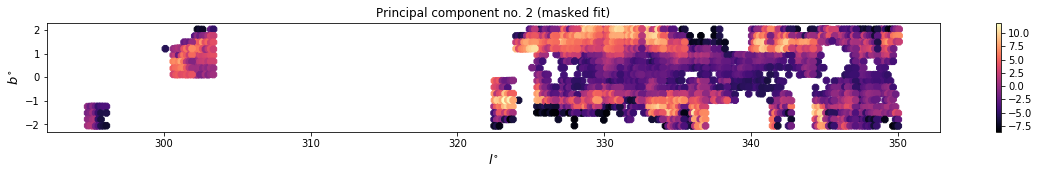

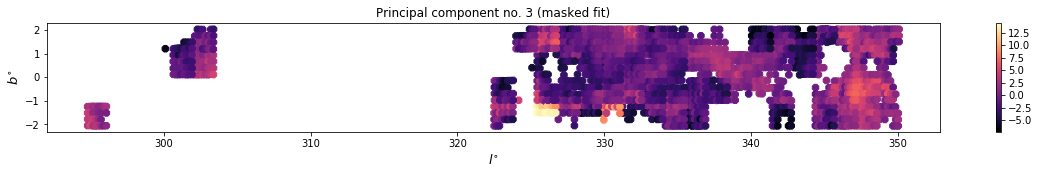

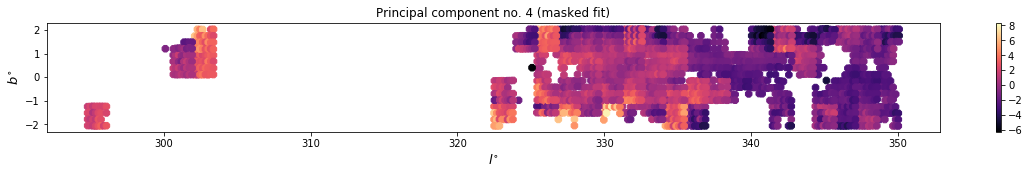

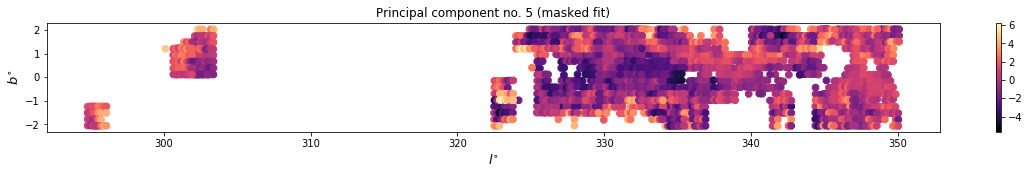

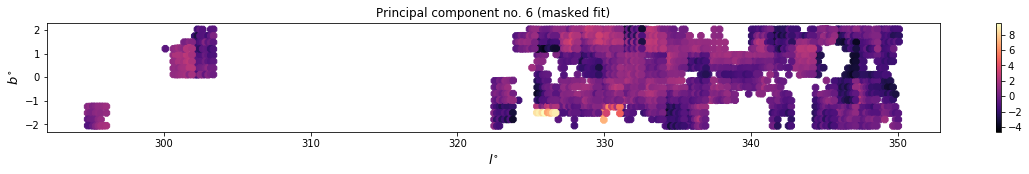

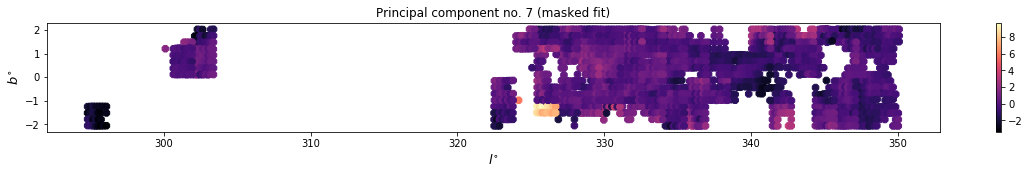

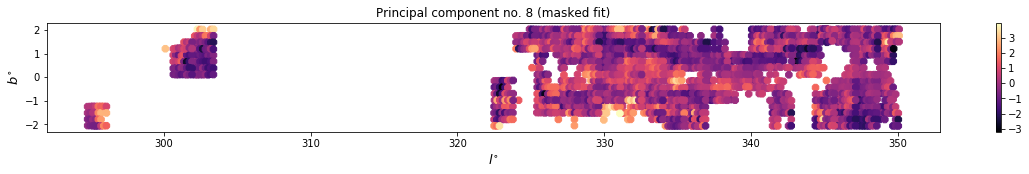

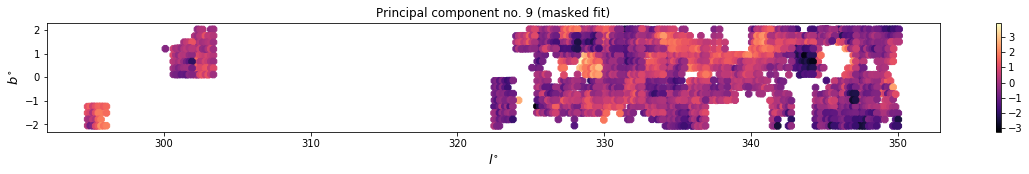

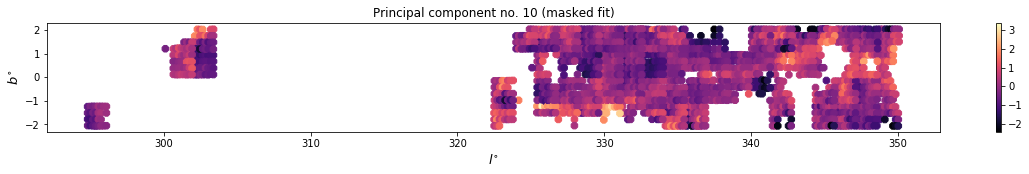

In [90]:
for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,2),facecolor='w',edgecolor='k')
    plt.scatter(pointings_avg[mask,0], pointings_avg[mask,1], c=H_small_mask[:,i], cmap='magma', marker='8',s=50);
    plt.colorbar()
    ax.set_title('Principal component no. %d (masked fit)' %(i+1) )
    plt.xlabel("$l ^{\circ}$",fontsize=13)
    plt.ylabel("$b ^{\circ}$",fontsize=13)
    #plt.savefig("PC_galactic_l_b_%d.png" %i)

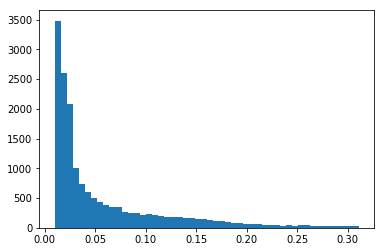

In [108]:
mstddev = H_array[mask].std(axis=0)
mstddev = mstddev[mstddev>0.01]
mxedges, myedges, mpatch = plt.hist(mstddev, bins=50)

In [121]:
from sklearn.manifold import TSNE
import time
n_sne = 10
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(H_array)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne_results.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2338 samples in 4.451s...
[t-SNE] Computed neighbors for 2338 samples in 234.806s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2338
[t-SNE] Computed conditional probabilities for sample 2000 / 2338
[t-SNE] Computed conditional probabilities for sample 2338 / 2338
[t-SNE] Mean sigma: 2.236781
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.026085
[t-SNE] Error after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE done! Time elapsed: 258.7979779243469 seconds


(2338, 2)

In [137]:
H_array_tsne = TSNE(n_components=2).fit_transform(H_array)

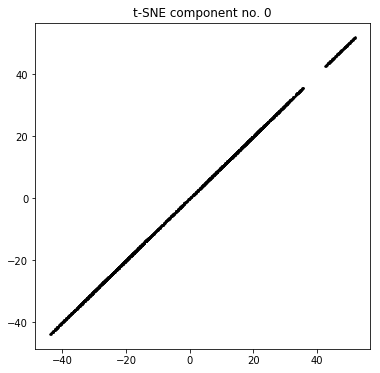

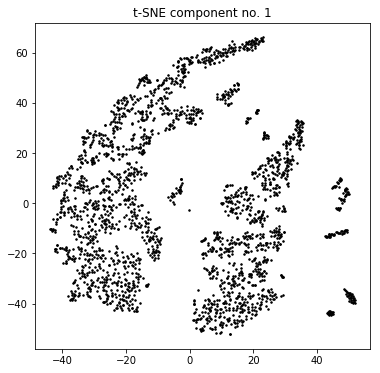

In [140]:
for i in np.arange(np.shape(tsne.embedding_)[1]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6),facecolor='w',edgecolor='k')
    ax.plot(H_array_tsne[:,0], H_array_tsne[:,i], 'k.', ms=3.)
    ax.set_title('t-SNE component no. %d' %(i) )

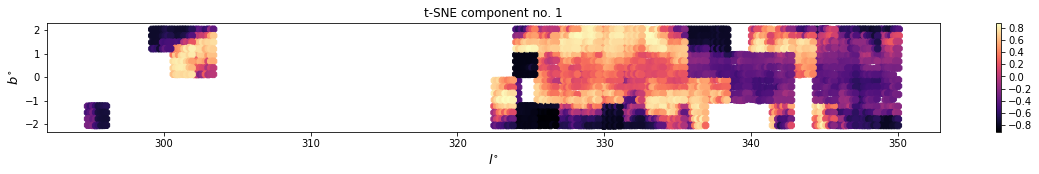

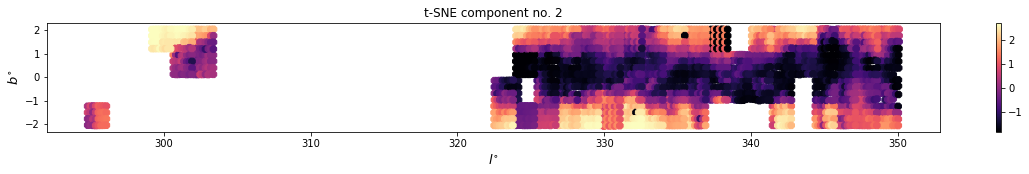

In [136]:
savename = "pc_plots_drive_%d_%d.png"
blocknumber = 10
for i in range(np.shape(tsne.embedding_)[1]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,2),facecolor='w',edgecolor='k')
    plt.scatter(pointings_avg[:,0], pointings_avg[:,1], c=tsne.embedding_[:,i], cmap='magma', marker='8',s=50);
    plt.colorbar()
    ax.set_title('t-SNE component no. %d' %(i+1) )
    plt.xlabel("$l ^{\circ}$",fontsize=13)
    plt.ylabel("$b ^{\circ}$",fontsize=13)